In [1]:

from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

import seaborn as sns

from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model.

%matplotlib inline 
import matplotlib.pylab as plt


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
credit_df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
credit_df.rename(columns={
    "default.payment.next.month": "default", }, inplace=True)

In [4]:
fil = (credit_df.EDUCATION == 5) | (credit_df.EDUCATION == 6) | (credit_df.EDUCATION == 0)
credit_df.loc[fil, 'EDUCATION'] = 4
credit_df.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [5]:
# Mapping dictionary for EDUCATION column
education_mapping = {
    1: "Graduate school",
    2: "University",
    3: "High school",
    4: "Others"
}

# Replace the values in the EDUCATION column
credit_df['EDUCATION'] = credit_df['EDUCATION'].replace(education_mapping)

# Verify the changes
credit_df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,University,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,University,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,University,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,University,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,University,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
credit_df.loc[credit_df.MARRIAGE == 0, 'MARRIAGE'] = 3
credit_df.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [7]:
# Mapping dictionary for EDUCATION column
marriage_mapping = {
    1: "Married",
    2: "Single",
    3: "Others"
}

# Replace the values in the EDUCATION column
credit_df['MARRIAGE'] = credit_df['MARRIAGE'].replace(marriage_mapping)

# Verify the changes
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
# Mapping dictionary for EDUCATION column
gender_mapping = {
    1: "Male",
    2: "Female",
    
}

# Replace the values in the EDUCATION column
credit_df['SEX'] = credit_df['SEX'].replace(gender_mapping)

# Verify the changes
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
# Print unique values for specific columns
for column in ['SEX', 'EDUCATION', 'MARRIAGE']:
    print(f"Unique values in '{column}': {credit_df[column].unique()}")

Unique values in 'SEX': ['Female' 'Male']
Unique values in 'EDUCATION': ['University' 'Graduate school' 'High school' 'Others']
Unique values in 'MARRIAGE': ['Married' 'Single' 'Others']


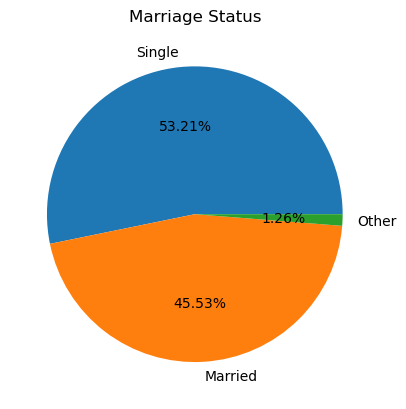

In [10]:
value_counts_marriage = credit_df['MARRIAGE'].value_counts()

plt.pie(value_counts_marriage, labels = ['Single','Married','Other'],autopct='%.2f%%' )
plt.title('Marriage Status')
plt.show()

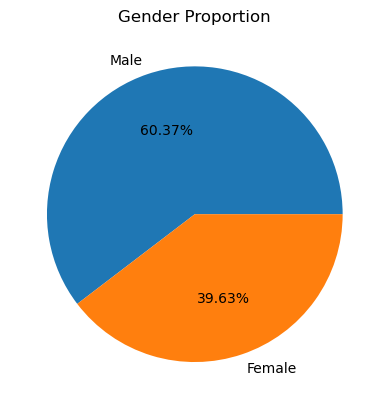

In [11]:
sex_calculation = credit_df['SEX'].value_counts()
#print(sex_calculation)
plt.pie(sex_calculation, labels = ['Male','Female'],autopct='%.2f%%')
plt.title("Gender Proportion")
plt.show()

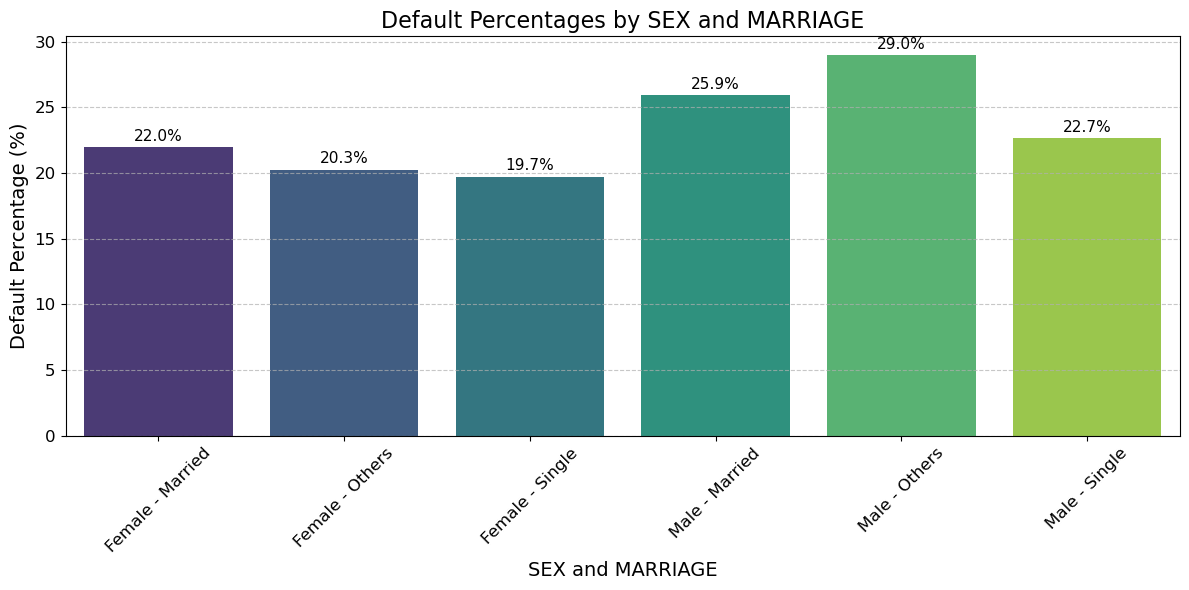

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rename 'default.payment.next.month' to 'default' for simplicity
credit_df.rename(columns={'default.payment.next.month': 'default'}, inplace=True)

# Convert 'SEX' and 'MARRIAGE' to string for concatenation
credit_df['SEX'] = credit_df['SEX'].astype(str)
credit_df['MARRIAGE'] = credit_df['MARRIAGE'].astype(str)

# Creating a combined column to represent SEX and MARRIAGE
credit_df['SEX_MARRIAGE'] = credit_df['SEX'] + ' - ' + credit_df['MARRIAGE']

# Group by SEX_MARRIAGE and default to calculate counts
grouped = credit_df.groupby(['SEX_MARRIAGE', 'default']).size().unstack(fill_value=0)

# Calculate default percentages
grouped['Default_Percentage'] = grouped[1] / (grouped[0] + grouped[1]) * 100

# Reset index for plotting
percentage_data = grouped[['Default_Percentage']].reset_index()

# Plot the default percentages
plt.figure(figsize=(12, 6))
sns.barplot(
    x='SEX_MARRIAGE',
    y='Default_Percentage',
    data=percentage_data,
    palette='viridis'
)

# Add titles and labels
plt.title('Default Percentages by SEX and MARRIAGE', fontsize=16)
plt.xlabel('SEX and MARRIAGE', fontsize=14)
plt.ylabel('Default Percentage (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on bars
for i, row in percentage_data.iterrows():
    plt.text(
        i,
        row['Default_Percentage'] + 0.5,
        f"{row['Default_Percentage']:.1f}%",
        ha='center', fontsize=11, color='black'
    )

plt.tight_layout()
plt.show()

In [18]:
credit_df.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [19]:
# Define age group bins and labels
bins = [20, 35, 50, 80]  # Bin edges for age groups
labels = ['Young', 'Middle', 'Old']  # Labels for age groups

# Create a new column for age groups
credit_df['Age_Group'] = pd.cut(credit_df['AGE'], bins=bins, labels=labels, right=False)

# Print the number of data points in each age group
age_group_counts = credit_df['Age_Group'].value_counts().reset_index()
age_group_counts.columns = ['Age_Group', 'Count']

print(age_group_counts)


  Age_Group  Count
0     Young  15696
1    Middle  11624
2       Old   2680


C:\Users\khush\AppData\Local\Temp\ipykernel_5216\532426175.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age = credit_df.groupby('Age_Group')['default'].value_counts(normalize=True).unstack(fill_value=0)
d:\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


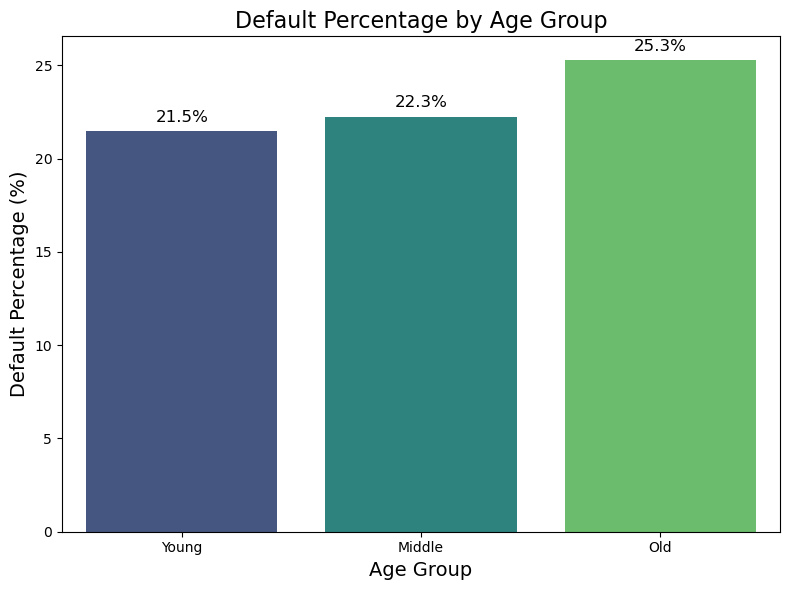

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define age group bins and labels
bins = [20, 35, 50, 80]  # Bin edges for age groups
labels = ['Young', 'Middle', 'Old']  # Labels for age groups

# Create a new column for age groups
credit_df['Age_Group'] = pd.cut(credit_df['AGE'], bins=bins, labels=labels, right=False)

# Group data by Age_Group and calculate default counts and percentages
grouped_age = credit_df.groupby('Age_Group')['default'].value_counts(normalize=True).unstack(fill_value=0)

# Calculate default percentage
grouped_age['Default_Percentage'] = grouped_age[1] * 100  # Column '1' is defaulted (1)

# Reset index for visualization
age_percentage_data = grouped_age[['Default_Percentage']].reset_index()

# Plot the default percentages for age groups
plt.figure(figsize=(8, 6))
sns.barplot(
    x='Age_Group', 
    y='Default_Percentage', 
    data=age_percentage_data, 
    palette='viridis'
)

# Add titles and labels
plt.title('Default Percentage by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Default Percentage (%)', fontsize=14)

# Add percentage labels on bars
for i, row in age_percentage_data.iterrows():
    plt.text(
        i, 
        row['Default_Percentage'] + 0.5, 
        f"{row['Default_Percentage']:.1f}%", 
        ha='center', fontsize=12, color='black'
    )

plt.tight_layout()
plt.show()

  Age_Group_10yr  Default_Percentage
0          20-29           22.842587
1          30-39           20.252714
2          40-49           22.973391
3          50-59           24.861170
4          60-69           28.343949
5          70-79           28.000000


C:\Users\khush\AppData\Local\Temp\ipykernel_5216\601505483.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_df.groupby('Age_Group_10yr')['default']
d:\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


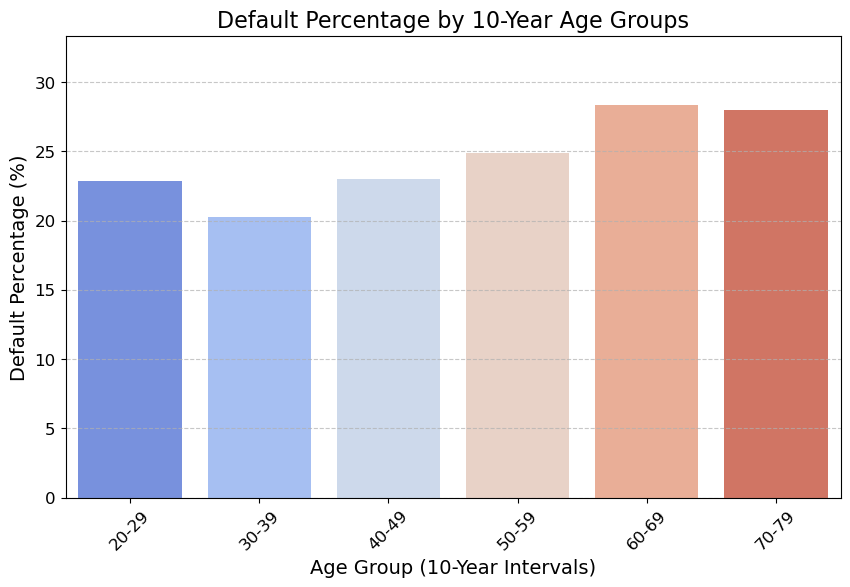

In [23]:
# Define bins and labels for 10-year age groups
bins = range(20, 81, 10)  # From 20 to 80 with intervals of 10
labels = [f'{bins[i]}-{bins[i+1] - 1}' for i in range(len(bins) - 1)]

# Create the age group column
credit_df['Age_Group_10yr'] = pd.cut(credit_df['AGE'], bins=bins, labels=labels, right=False)

# Calculate default percentage for each 10-year age group
age_group_default_10yr_summary = (
    credit_df.groupby('Age_Group_10yr')['default']
    .mean()
    .reset_index()
    .rename(columns={'default': 'Default_Percentage'})
)

# Convert to percentage
age_group_default_10yr_summary['Default_Percentage'] *= 100

# Display the data
print(age_group_default_10yr_summary)

# Visualization of default percentage by 10-year age group
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Age_Group_10yr',
    y='Default_Percentage',
    data=age_group_default_10yr_summary,
    palette='coolwarm'
)
plt.title('Default Percentage by 10-Year Age Groups', fontsize=16)
plt.xlabel('Age Group (10-Year Intervals)', fontsize=14)
plt.ylabel('Default Percentage (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, age_group_default_10yr_summary['Default_Percentage'].max() + 5)  # Add space above max value
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [24]:
credit_df.rename(columns={
    "default.payment.next.month": "default", 
    'PAY_0': 'status_sept', 
    'PAY_2': 'status_aug', 
    'PAY_3': 'status_jul', 
    'PAY_4': 'status_jun', 
    'PAY_5': 'status_may', 
    'PAY_6': 'status_apr'
}, inplace=True)

# Print the updated column names
credit_df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'status_sept',
       'status_aug', 'status_jul', 'status_jun', 'status_may', 'status_apr',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default', 'SEX_MARRIAGE', 'Age_Group', 'Age_Group_10yr'],
      dtype='object')

In [25]:
# Mapping dictionary with shorter names using "d"
status_mapping = {
    -2: "No use",
    -1: "Paid full",
    0: "Revolving",
    1: "1d",
    2: "2d",
    3: "3d",
    4: "4d",
    5: "5d",
    6: "6d",
    7: "7d",
    8: "8d",
    9: "9+d"
}

# Apply the mapping to all status columns
status_columns = ['status_sept', 'status_aug', 'status_jul', 'status_jun', 'status_may', 'status_apr']

credit_df[status_columns] = credit_df[status_columns].replace(status_mapping)

# Verify the changes
print(credit_df[status_columns].head())

  status_sept status_aug status_jul status_jun status_may status_apr
0          2d         2d  Paid full  Paid full     No use     No use
1   Paid full         2d  Revolving  Revolving  Revolving         2d
2   Revolving  Revolving  Revolving  Revolving  Revolving  Revolving
3   Revolving  Revolving  Revolving  Revolving  Revolving  Revolving
4   Paid full  Revolving  Paid full  Revolving  Revolving  Revolving


Unique values in status columns:
status_sept: ['2d' 'Paid full' 'Revolving' 'No use' '1d' '3d' '4d' '8d' '7d' '5d' '6d']
status_aug: ['2d' 'Revolving' 'Paid full' 'No use' '3d' '5d' '7d' '4d' '1d' '6d' '8d']
status_jul: ['Paid full' 'Revolving' '2d' 'No use' '3d' '4d' '6d' '7d' '1d' '5d' '8d']
status_jun: ['Paid full' 'Revolving' 'No use' '2d' '3d' '4d' '5d' '7d' '6d' '1d' '8d']
status_may: ['No use' 'Revolving' 'Paid full' '2d' '3d' '5d' '4d' '7d' '8d' '6d']
status_apr: ['No use' '2d' 'Revolving' 'Paid full' '3d' '6d' '4d' '7d' '8d' '5d']
Rows with valid statuses in status_sept: 29981
Rows with valid statuses in status_aug: 29999


d:\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
d:\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Rows with valid statuses in status_jul: 29997
Rows with valid statuses in status_jun: 29998
Rows with valid statuses in status_may: 29999
Rows with valid statuses in status_apr: 29998


d:\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
d:\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
d:\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper

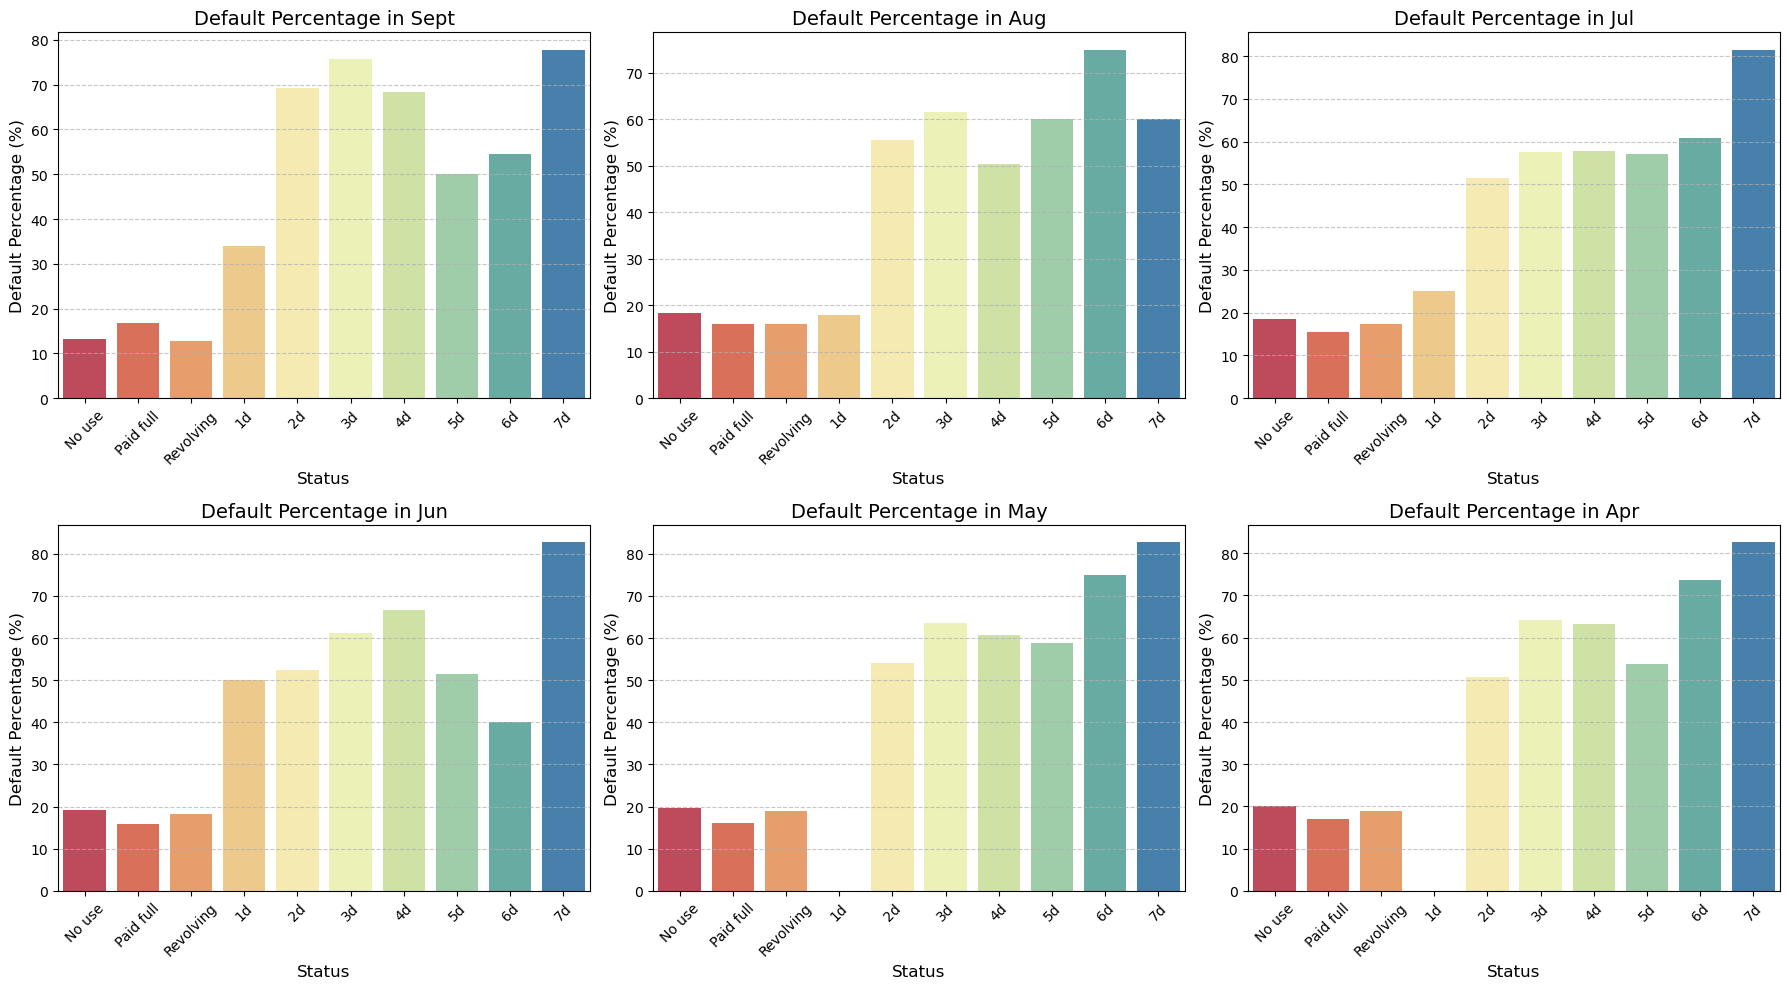

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Check for repayment statuses in status columns
status_columns = ['status_sept', 'status_aug', 'status_jul', 'status_jun', 'status_may', 'status_apr']
print("Unique values in status columns:")
for col in status_columns:
    print(f"{col}: {credit_df[col].unique()}")

# Updated Mapping of repayment statuses
status_mapping = {
    "No use": "No use", "Paid full": "Paid full", "Revolving": "Revolving",
    "1d": "1d", "2d": "2d", "3d": "3d", "4d": "4d", "5d": "5d", "6d": "6d", "7d": "7d"
}

# Valid statuses for filtering
status_order = ["No use", "Paid full", "Revolving", "1d", "2d", "3d", "4d", "5d", "6d", "7d"]

# 2x3 grid for visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the grid for iteration

# Loop through each column and plot
for i, col in enumerate(status_columns):
    # Check for valid statuses
    filtered_data = credit_df[credit_df[col].isin(status_order)]

    # Debugging: Check the number of rows after filtering
    print(f"Rows with valid statuses in {col}: {len(filtered_data)}")

    # Calculate default percentages
    status_default_summary = (
        filtered_data.groupby(col)['default']
        .mean()
        .reset_index()
        .rename(columns={'default': 'Default_Percentage'})
    )

    # Convert to percentage
    status_default_summary['Default_Percentage'] *= 100

    # Sort and preserve order
    status_default_summary[col] = pd.Categorical(
        status_default_summary[col], categories=status_order, ordered=True
    )
    status_default_summary = status_default_summary.sort_values(by=col)

    # Plot the data if not empty
    if not status_default_summary.empty:
        sns.barplot(
            x=col,
            y='Default_Percentage',
            data=status_default_summary,
            palette='Spectral',
            ax=axes[i]
        )
        axes[i].set_title(f"Default Percentage in {col.split('_')[1].capitalize()}", fontsize=14)
        axes[i].set_xlabel('Status', fontsize=12)
        axes[i].set_ylabel('Default Percentage (%)', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    else:
        axes[i].text(0.5, 0.5, "No Data Available", ha='center', va='center', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

In [38]:
credit_df.rename(columns={
    'BILL_AMT1': 'bill_sept',
    'BILL_AMT2': 'bill_aug',
    'BILL_AMT3': 'bill_jul',
    'BILL_AMT4': 'bill_jun',
    'BILL_AMT5': 'bill_may',
    'BILL_AMT6': 'bill_apr',
    'PAY_AMT1': 'paid_sept',
    'PAY_AMT2': 'paid_aug',
    'PAY_AMT3': 'paid_jul',
    'PAY_AMT4': 'paid_jun',
    'PAY_AMT5': 'paid_may',
    'PAY_AMT6': 'paid_apr'
}, inplace=True)

# Print the updated column names
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'status_sept',
       'status_aug', 'status_jul', 'status_jun', 'status_may', 'status_apr',
       'bill_sept', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr',
       'paid_sept', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may', 'paid_apr',
       'default', 'SEX_MARRIAGE', 'Age_Group', 'Age_Group_10yr'],
      dtype='object')

In [39]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'status_sept',
       'status_aug', 'status_jul', 'status_jun', 'status_may', 'status_apr',
       'bill_sept', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr',
       'paid_sept', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may', 'paid_apr',
       'default', 'SEX_MARRIAGE', 'Age_Group', 'Age_Group_10yr'],
      dtype='object')

In [40]:
# Clean column names to remove leading/trailing spaces or hidden characters
credit_df.columns = credit_df.columns.str.strip()

# Verify cleaned column names
print(credit_df.columns)


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'status_sept',
       'status_aug', 'status_jul', 'status_jun', 'status_may', 'status_apr',
       'bill_sept', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr',
       'paid_sept', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may', 'paid_apr',
       'default', 'SEX_MARRIAGE', 'Age_Group', 'Age_Group_10yr'],
      dtype='object')


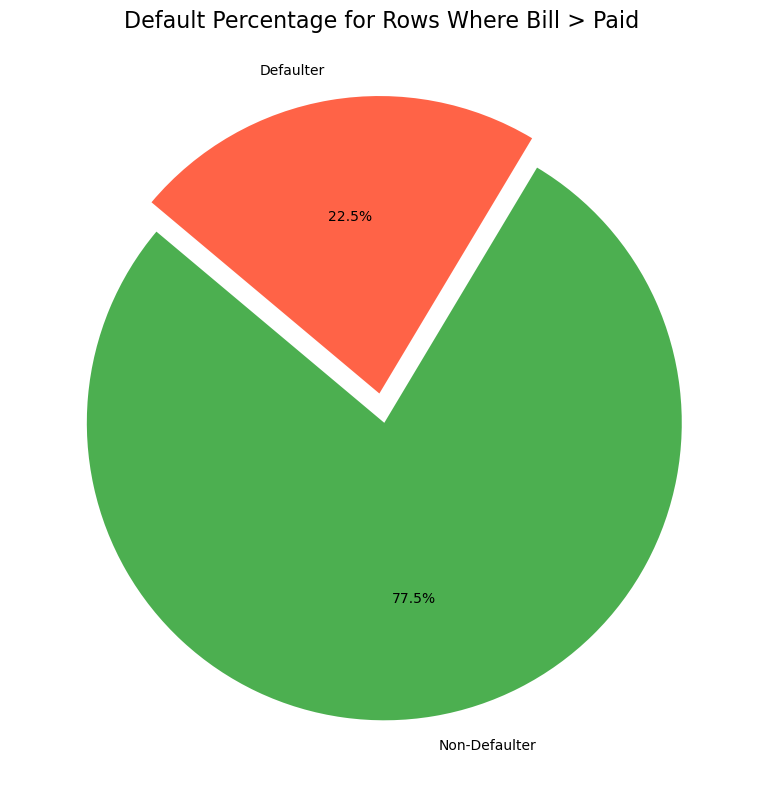

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sum the bill and paid amounts for all months
credit_df['total_bill'] = credit_df[['bill_sept', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr']].sum(axis=1)
credit_df['total_paid'] = credit_df[['paid_sept', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may', 'paid_apr']].sum(axis=1)

# Create a new column that checks if total bill is greater than total paid
credit_df['bill_greater_than_paid'] = credit_df['total_bill'] > credit_df['total_paid']

# Filter data where bill > paid
filtered_data = credit_df[credit_df['bill_greater_than_paid']]

# Calculate percentages of defaulters and non-defaulters
default_counts = filtered_data['default'].value_counts(normalize=True) * 100
default_labels = ['Non-Defaulter', 'Defaulter']

# Visualization of the default percentages as a pie chart
plt.figure(figsize=(8, 8))
colors = ['#4CAF50', '#FF6347']  # Green for Non-Defaulter, Red for Defaulter

plt.pie(
    default_counts, 
    labels=default_labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    explode=[0.05, 0.05]  # Slight separation for both segments
)

# Customize the title
plt.title('Default Percentage for Rows Where Bill > Paid', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

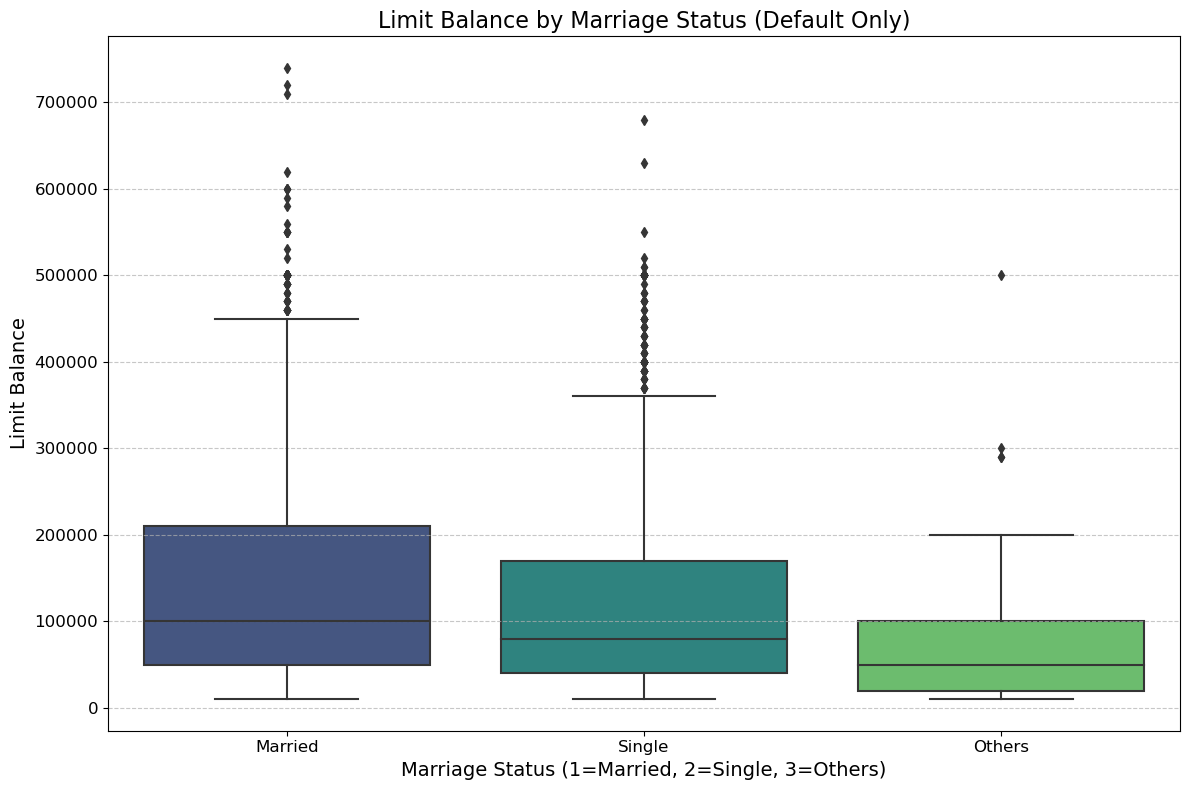

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to include only rows where default == 1
default_data = credit_df[credit_df['default'] == 1]

# Setting up the plot
plt.figure(figsize=(12, 8))

# Creating the box plot for "Default" only
sns.boxplot(
    x='MARRIAGE', 
    y='LIMIT_BAL', 
    data=default_data, 
    palette='viridis'
)

# Adding titles and labels
plt.title('Limit Balance by Marriage Status (Default Only)', fontsize=16)
plt.xlabel('Marriage Status (1=Married, 2=Single, 3=Others)', fontsize=14)
plt.ylabel('Limit Balance', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Showing the plot
plt.tight_layout()
plt.show()

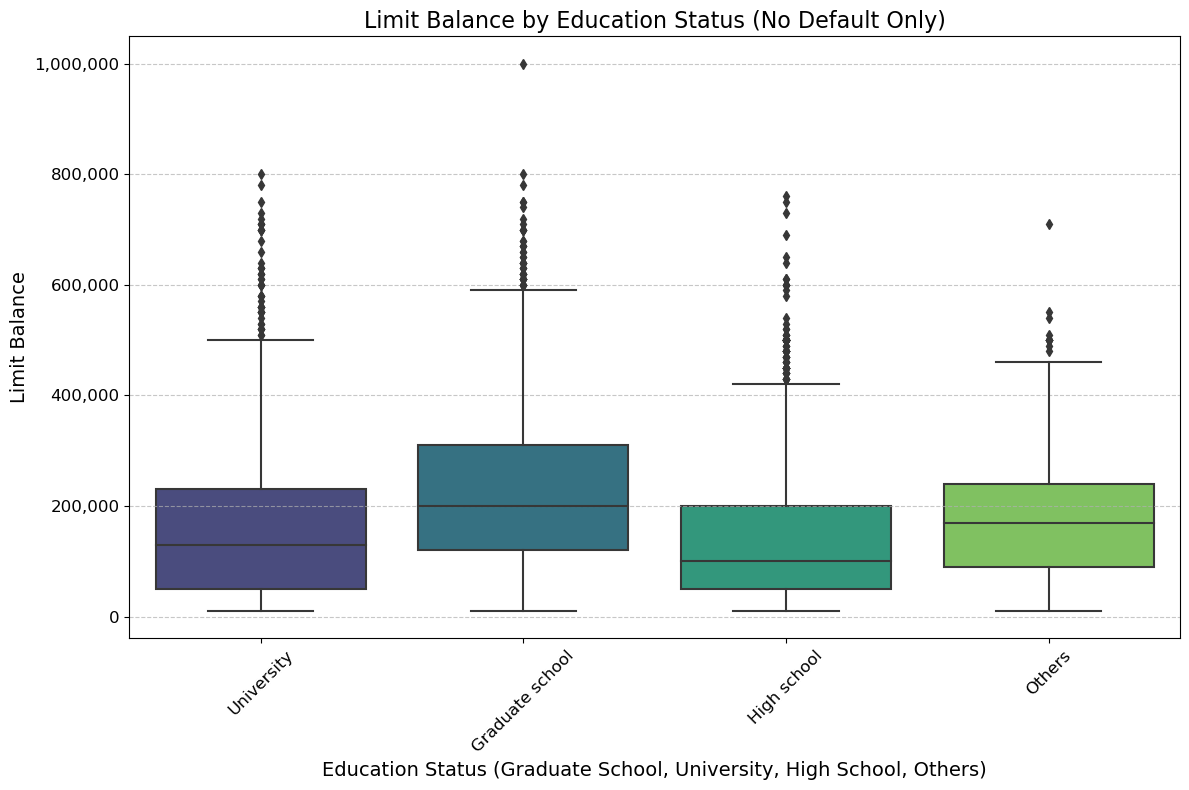

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Filter the data to include only rows where default == 0
default_data = credit_df[credit_df['default'] == 0]

# Setting up the plot
plt.figure(figsize=(12, 8))

# Creating the box plot for Education with Default only
sns.boxplot(
    x='EDUCATION', 
    y='LIMIT_BAL', 
    data=default_data, 
    palette='viridis'
)

# Adding titles and labels
plt.title('Limit Balance by Education Status (No Default Only)', fontsize=16)
plt.xlabel('Education Status (Graduate School, University, High School, Others)', fontsize=14)
plt.ylabel('Limit Balance', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Format y-axis to show plain numbers (no scientific notation)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Showing the plot
plt.tight_layout()
plt.show()

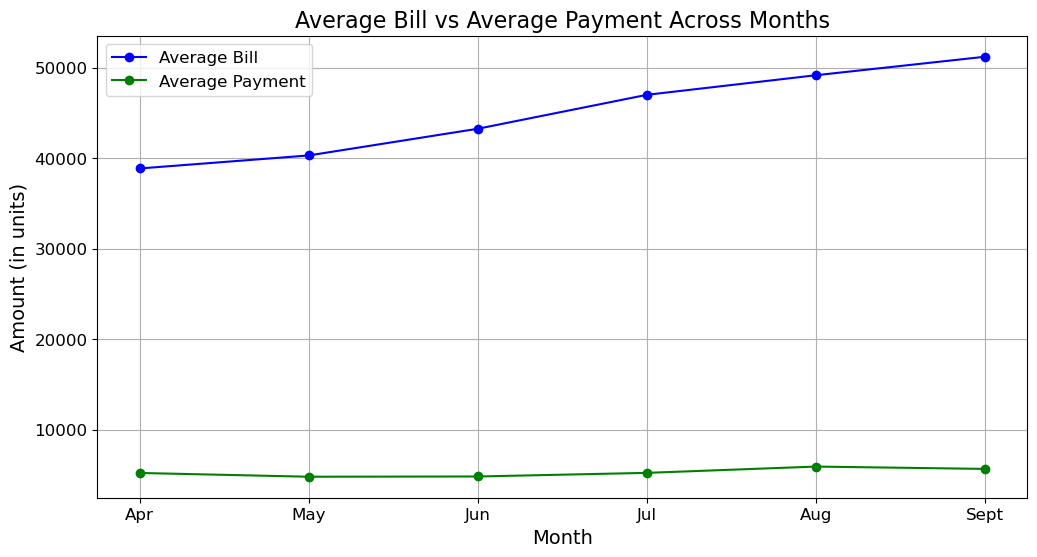

In [119]:
# Plotting bills and payments across months
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept']
bill_columns = ['bill_apr', 'bill_may', 'bill_jun', 'bill_jul', 'bill_aug', 'bill_sept']
paid_columns = ['paid_apr', 'paid_may', 'paid_jun', 'paid_jul', 'paid_aug', 'paid_sept']

plt.figure(figsize=(12, 6))

# Plotting bills
plt.plot(months, credit_df[bill_columns].mean(), label='Average Bill', marker='o', linestyle='-', color='blue')

# Plotting payments
plt.plot(months, credit_df[paid_columns].mean(), label='Average Payment', marker='o', linestyle='-', color='green')

# Adding title and labels
plt.title('Average Bill vs Average Payment Across Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Amount (in units)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.grid(True)
plt.show()


/var/folders/jh/mp1rq7qd22lbglyqfp98ctr40000gn/T/ipykernel_31817/2482579748.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_df['due_ratio'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)
/var/folders/jh/mp1rq7qd22lbglyqfp98ctr40000gn/T/ipykernel_31817/2482579748.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

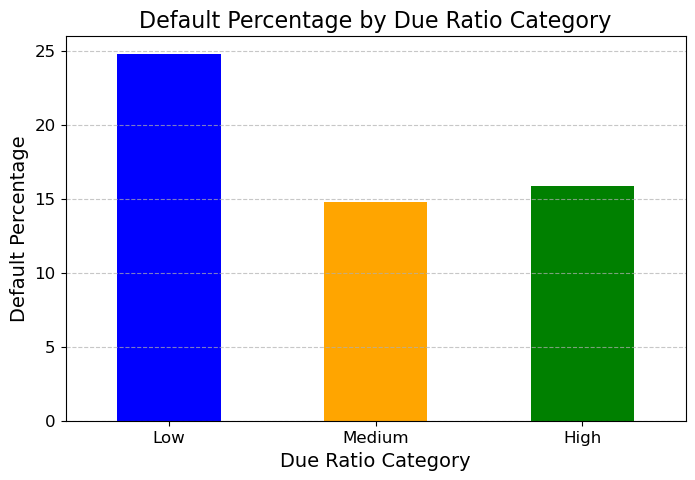

In [139]:
import pandas as pd

# Calculate the due ratio for each data point
credit_df['due_ratio'] = credit_df[['paid_apr', 'paid_may', 'paid_jun', 'paid_jul', 'paid_aug', 'paid_sept']].sum(axis=1) / \
                         credit_df[['bill_apr', 'bill_may', 'bill_jun', 'bill_jul', 'bill_aug', 'bill_sept']].sum(axis=1)

# Handle infinite and NaN values in the due ratio
credit_df['due_ratio'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)
credit_df['due_ratio'].fillna(0, inplace=True)

# Categorize due ratios into bins: low, medium, high
bins = [0, 0.5, 1, float('inf')]
labels = ['Low', 'Medium', 'High']
credit_df['due_ratio_category'] = pd.cut(credit_df['due_ratio'], bins=bins, labels=labels, right=False)

# Calculate the default percentages for each due ratio category
default_percentage_due_ratio = credit_df.groupby('due_ratio_category')['default'].mean() * 100

# Visualize the results
import matplotlib.pyplot as plt

# Plotting the default percentages for each due ratio category
plt.figure(figsize=(8, 5))
default_percentage_due_ratio.plot(kind='bar', color=['blue', 'orange', 'green'])

# Adding labels and title
plt.title('Default Percentage by Due Ratio Category', fontsize=16)
plt.xlabel('Due Ratio Category', fontsize=14)
plt.ylabel('Default Percentage', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()
